## Biometric Data Analysis
#### Jake Breitfeller
#### The goal of this project is to create a simple function that can take average accelerant data from smart device biometric hardware and make a prediction about the type of task which is being performed 

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm as cm
import seaborn as sns

#### The two hardware devices used to calculate accelerant data are the Accelerometer and the Gyroscope
#### Smart phones and smart watches are used to gather this data so there are 4 different groups of data to gather from

In [89]:
##Smart Phone Accelerometer Data
phoneaccel0 = pd.read_csv("data_1600_accel_phone.csv")
phoneaccel1 = pd.read_csv("data_1601_accel_phone.csv")
phoneaccel2 = pd.read_csv("data_1602_accel_phone.csv")
phoneaccel3 = pd.read_csv("data_1603_accel_phone.csv")
phoneaccel4 = pd.read_csv("data_1604_accel_phone.csv")

In [90]:
##Smart Phone Gyroscope Data
phonegyro0 = pd.read_csv("data_1600_gyro_phone.csv")
phonegyro1 = pd.read_csv("data_1601_gyro_phone.csv")
phonegyro2 = pd.read_csv("data_1602_gyro_phone.csv")
phonegyro3 = pd.read_csv("data_1603_gyro_phone.csv")
phonegyro4 = pd.read_csv("data_1604_gyro_phone.csv")

In [91]:
##Smart Watch Accelerometer Data
watchaccel0 = pd.read_csv("data_1600_accel_watch.csv")
watchaccel1 = pd.read_csv("data_1601_accel_watch.csv")
watchaccel2 = pd.read_csv("data_1602_accel_watch.csv")
watchaccel3 = pd.read_csv("data_1603_accel_watch.csv")
watchaccel4 = pd.read_csv("data_1604_accel_watch.csv")

In [92]:
##Smart Watch Gyroscope Data
watchgyro0 = pd.read_csv("data_1600_gyro_watch.csv")
watchgyro1 = pd.read_csv("data_1601_gyro_watch.csv")
watchgyro2 = pd.read_csv("data_1602_gyro_watch.csv")
watchgyro3 = pd.read_csv("data_1603_gyro_watch.csv")
watchgyro4 = pd.read_csv("data_1604_gyro_watch.csv")

#### The data from these five subjects is combined so the machine learning programs can work with data from a specific biometric device or the combined data from all of the devices
#### The data is also sliced to isolate the accelerant data which is the main statistic being measured

In [93]:
mergephoneaccel = [phoneaccel0,phoneaccel1,phoneaccel2,phoneaccel3,phoneaccel4]
phoneacceldata = pd.concat(mergephoneaccel)
phone_accel = phoneacceldata[['ACTIVITY','RESULTANT']].copy()

mergephonegyro = [phonegyro0,phonegyro1,phonegyro2,phonegyro3,phonegyro4]
phonegyrodata = pd.concat(mergephonegyro)
phone_gyro = phonegyrodata[['ACTIVITY','RESULTANT']].copy()

mergewatchaccel = [watchaccel0,watchaccel1,watchaccel2,watchaccel3]
watchacceldata = pd.concat(mergewatchaccel)
watch_accel = watchacceldata[['ACTIVITY','RESULTANT']].copy()

mergewatchgyro = [watchgyro0,watchgyro1,watchgyro2,watchgyro3]
watchgyrodata = pd.concat(mergewatchgyro)
watch_gyro = watchgyrodata[['ACTIVITY','RESULTANT']].copy()

merged = [phoneacceldata,phonegyrodata,watchacceldata,watchgyrodata]
combinedaccelgyroset = pd.concat(merged)
combined_data = combinedaccelgyroset[['ACTIVITY','RESULTANT']].copy()

In [94]:
## UCI provided the following key to relate each activity key 
## with the respective activity being performed by the subject

##walking = A = 1
##jogging = B = 2
##stairs = C = 3
##sitting = D = 4
##standing = E = 5
##typing = F = 6
##teeth = G = 7
##soup = H = 8
##chips = I = 9
##pasta = J = 10
##drinking = K = 11
##sandwich = L = 12
##kicking = M = 13
##catch = O = 14
##dribbling = P = 15
##writing = Q = 16
##clapping = R = 17
##folding = S = 18

#### These four slides apply the numbers in the key above to activites so KMeans can read the data

In [95]:
phone_accel.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','O','P','Q','R','S']
                      ,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

,ACTIVITY,RESULTANT
0,1,10.05180
1,1,10.11710
2,1,9.98384
3,1,10.10600
4,1,10.05210
...,...,...
316,18,9.77913
317,18,9.79550
318,18,9.76903
319,18,9.80912


In [96]:
phone_gyro.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','O','P','Q','R','S']
                      ,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

,ACTIVITY,RESULTANT
0,1,1.080990
1,1,1.116030
2,1,1.119920
3,1,1.073060
4,1,0.973460
...,...,...
316,18,0.168049
317,18,0.175882
318,18,0.253770
319,18,0.154717


In [97]:
watch_accel.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','O','P','Q','R','S']
                      ,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

,ACTIVITY,RESULTANT
0,1,12.7783
1,1,12.8712
2,1,12.5949
3,1,12.3521
4,1,12.4168
...,...,...
319,18,10.7500
320,18,10.9811
321,18,10.9130
322,18,11.1360


In [98]:
watch_gyro.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','O','P','Q','R','S']
                      ,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

,ACTIVITY,RESULTANT
0,1,4.04589
1,1,4.02048
2,1,3.78650
3,1,3.77595
4,1,3.54575
...,...,...
319,18,2.20318
320,18,2.45403
321,18,2.36863
322,18,2.48585


In [99]:
biometrics = combined_data.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','O','P','Q','R','S']
                      ,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])


In [100]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import kneighbors_graph
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import homogeneity_score

#### The graph produced below displays tasks with different colors based upon accelarant data categorizing different tasks into clusters

In [101]:
X = biometrics.to_numpy()

n_samples, n_features = combined_data.shape
cmap = ListedColormap(["#e41a1a","#e46e1a","#e0c74a","#5bd9b3","#5bd9d3","#5bb1d9","#1a42c7","#585085","#9779b5","#c65dde","#db51db","#435234","#17524e","#1d0b2e","#b36d75","#82a884","#b58f60","#000000"])

Text(0, 0.5, 'Accelerant Results')

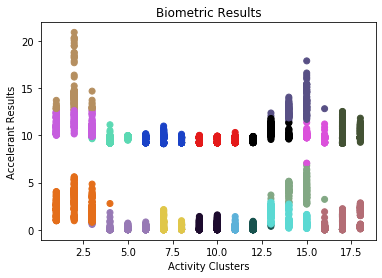

In [102]:
y_pred = KMeans(n_clusters=18, n_init=25, init='random', max_iter=15).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.title("Biometric Results")
plt.xlabel("Activity Clusters")
plt.ylabel("Accelerant Results")



#### The following slides will evaluate homogeneity score of the biometric data using the KMeans random model as well as the KMeans plus model

In [103]:
kmeans_rand_model = KMeans(n_clusters=18, n_init=28, init='random').fit_predict(X)

kmeans_plus_model = KMeans(n_clusters=18, n_init=28, init='k-means++').fit_predict(X)

In [104]:
y = biometrics["ACTIVITY"]
y.to_numpy()

array([ 1,  1,  1, ..., 18, 18, 18], dtype=int64)

In [105]:
print('% 25s' % 'method' +'      homogeneity')
def compare_method(estimator, name, data):

    estimator.fit(data)
    print('% 25s     %.3f ' % (name, metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=18, n_init=25)
compare_method(estimator=method, name="k-means++", data=X)


method = KMeans(init='random', n_clusters=18, n_init=25)
compare_method(estimator=method, name="random", data=X)


                   method      homogeneity
                k-means++     0.678 
                   random     0.683 
